In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/supra/Sales-Forecasting/Sales_Data.csv")

In [3]:
df.head()

,Month,Sales
0,1/1/2006,112
1,2/1/2006,118
2,3/1/2006,132
3,4/1/2006,129
4,5/1/2006,121


In [4]:
import datetime
# Create a new column (Date) to capture date information in date format
df['Date'] = df['Month'].apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%Y'))

# Delete original Date (Month) variable from dataframe
del df['Month']

# Set date as index
df.set_index('Date', inplace=True)

In [5]:
df.head()

,Sales
Date,
2006-01-01,112
2006-02-01,118
2006-03-01,132
2006-04-01,129
2006-05-01,121


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 2006-01-01 to 2017-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [9]:
df.Sales = df.Sales.astype("float32")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 2006-01-01 to 2017-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   144 non-null    float32
dtypes: float32(1)
memory usage: 1.7 KB


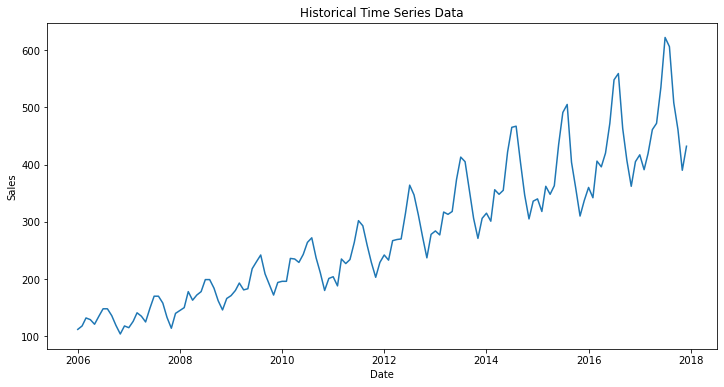

In [12]:
# Visualize the time series data.
plt.figure(figsize=(12, 6))
plt.plot(df['Sales'])
plt.title('Historical Time Series Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [13]:
rolmean = df.rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolstd = df.rolling(window=12).std()
print(rolmean,rolstd)

                 Sales
Date                  
2006-01-01         NaN
2006-02-01         NaN
2006-03-01         NaN
2006-04-01         NaN
2006-05-01         NaN
...                ...
2017-08-01  463.333333
2017-09-01  467.083333
2017-10-01  471.583333
2017-11-01  473.916667
2017-12-01  476.166667

[144 rows x 1 columns]                 Sales
Date                 
2006-01-01        NaN
2006-02-01        NaN
2006-03-01        NaN
2006-04-01        NaN
2006-05-01        NaN
...               ...
2017-08-01  83.630500
2017-09-01  84.617276
2017-10-01  82.541954
2017-11-01  79.502382
2017-12-01  77.737125

[144 rows x 1 columns]


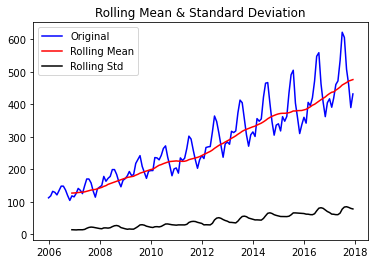

In [14]:
#Plot rolling statistics
orig = plt.plot(df, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)